In [1]:
import os
import shutil

import numpy as np
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [2]:
data_directory = './ecephys_cache' # must be updated to a valid directory in your filesystem

manifest_path = os.path.join(data_directory, "manifest.json")

In [3]:
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [4]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))


sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [5]:
filtered_sessions = sessions[(sessions.full_genotype.str.find('Sst') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISp' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print(len(filtered_sessions))
filtered_sessions.head()

6


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
756029989,2019-10-03T00:00:00Z,734865738,brain_observatory_1.1,96.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,684,2214,6,"[TH, DG, CA3, CA1, VISl, nan, PO, Eth, LP, VIS..."
758798717,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,593,1486,4,"[MGv, MGd, TH, DG, CA1, VISal, nan, SGN, LP, S..."
760693773,2019-10-03T00:00:00Z,738651054,brain_observatory_1.1,110.0,F,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,826,2233,6,"[grey, VISrl, nan, VISal, VISp, VISpm, VISam]"


In [6]:
probes = cache.get_probes()

print('Total number of probes: ' + str(len(probes)))

probes.head()

Total number of probes: 332


,ecephys_session_id,lfp_sampling_rate,name,phase,sampling_rate,has_lfp_data,unit_count,channel_count,ecephys_structure_acronyms
id,,,,,,,,,
729445648,719161530,1249.998642,probeA,3a,29999.967418,True,87,374,"[APN, LP, MB, DG, CA1, VISam, nan]"
729445650,719161530,1249.996620,probeB,3a,29999.918880,True,202,368,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan]"
729445652,719161530,1249.999897,probeC,3a,29999.997521,True,207,373,"[APN, NOT, MB, DG, SUB, VISp, nan]"
729445654,719161530,1249.996707,probeD,3a,29999.920963,True,93,358,"[grey, VL, CA3, CA2, CA1, VISl, nan]"
729445656,719161530,1249.999979,probeE,3a,29999.999500,True,138,370,"[PO, VPM, TH, LP, LGd, CA3, DG, CA1, VISal, nan]"


In [7]:
channels = cache.get_channels()

print('Total number of channels: ' + str(len(channels)))

channels.head()

Total number of channels: 123224


,ecephys_probe_id,local_index,probe_horizontal_position,probe_vertical_position,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,ecephys_structure_id,ecephys_structure_acronym,ecephys_session_id,lfp_sampling_rate,phase,sampling_rate,has_lfp_data,unit_count
id,,,,,,,,,,,,,,,
849705558,792645504,1,11,20,8165.0,3314.0,6862.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705560,792645504,2,59,40,8162.0,3307.0,6866.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705562,792645504,3,27,40,8160.0,3301.0,6871.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705564,792645504,4,43,60,8157.0,3295.0,6875.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0
849705566,792645504,5,11,60,8155.0,3288.0,6879.0,215.0,APN,779839471,1250.001479,3a,30000.035489,True,0


In [8]:
units = cache.get_units()

print('Total number of units: ' + str(len(units)))

Total number of units: 40010


In [9]:
session_id = 715093703
session = cache.get_session_data(session_id)

In [128]:
stim_idx = 5
stims = session.get_stimulus_epochs()
stim = stims.loc[stim_idx]
stims

,start_time,stop_time,duration,stimulus_name,stimulus_block
0,13.470683,73.537433,60.066750,spontaneous,null
1,73.537433,985.532551,911.995118,gabors,0
2,985.532551,1274.523973,288.991422,spontaneous,null
3,1274.523973,1573.023407,298.499434,flashes,1
4,1573.023407,1574.774823,1.751416,spontaneous,null
5,1574.774823,2174.275707,599.500885,drifting_gratings,2
6,2174.275707,2205.301633,31.025925,spontaneous,null
7,2205.301633,2805.836653,600.535020,natural_movie_three,3
8,2805.836653,2835.861733,30.025080,spontaneous,null
9,2835.861733,3136.112583,300.250850,natural_movie_one,4


In [250]:
unit_ids = units.ecephys_structure_acronym == "VISp"
print(unit_ids)
bin_edges = np.linspace(0, stim["duration"], 300)
counts = session.presentationwise_spike_counts(bin_edges=bin_edges,
                                               stimulus_presentation_ids=[stim_idx],
                                               unit_ids=unit_ids)

id
915956282    False
915956340    False
915956345    False
915956349    False
915956356    False
             ...  
951911942    False
951911948    False
951911955    False
951911961    False
951912003    False
Name: ecephys_structure_acronym, Length: 40010, dtype: bool


In [251]:
counts

<xarray.DataArray 'spike_counts' (stimulus_presentation_id: 1, time_relative_to_stimulus_onset: 299, unit_id: 60)>
array([[[ 0, 11, 18, ..., 92,  1,  1],
        [ 0,  2, 26, ..., 60,  0,  1],
        [ 0,  6, 22, ..., 59,  0,  1],
        ...,
        [ 0, 26, 10, ..., 33,  0,  2],
        [ 1, 17, 12, ..., 12,  0,  0],
        [ 0, 19, 18, ...,  2,  0,  0]]], dtype=uint16)
Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 5
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 1.003 ... 598.5
  * unit_id                          (unit_id) int64 950930145 ... 950933960

<IPython.core.display.Javascript object>


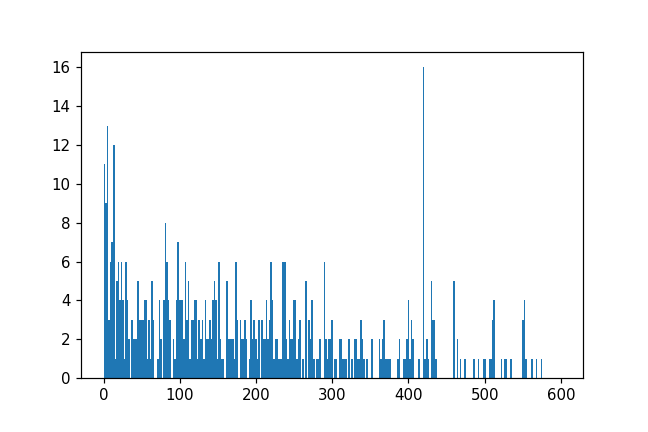

<BarContainer object of 299 artists>

In [252]:
import matplotlib.pyplot as plt
%matplotlib notebook
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
bin_width = bin_edges[1] - bin_edges[0]
plt.bar(bin_centers, counts[0, :, 4], width=bin_width)

In [253]:
X = np.array(counts)[0, :, :]
print(X.shape)
Xc = X - np.mean(X, axis=0, keepdims=True)

(299, 60)


In [254]:
cov = np.transpose(Xc) @ Xc / Xc.shape[0]
cov.shape

(60, 60)

In [255]:
U, S, Vh = np.linalg.svd(Xc)

In [256]:
Y = np.transpose(Vh @ np.transpose(Xc))

In [257]:
covY = np.transpose(Y) @ Y / Y.shape[0]
varY = S**2 / Y.shape[0]

<IPython.core.display.Javascript object>


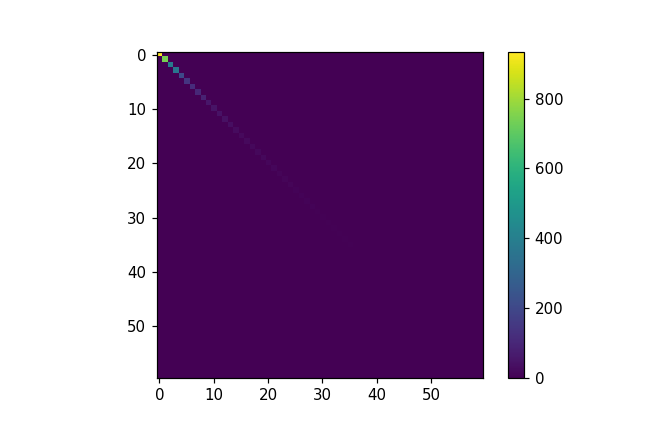

In [258]:
plt.figure()
plt.imshow(covY)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


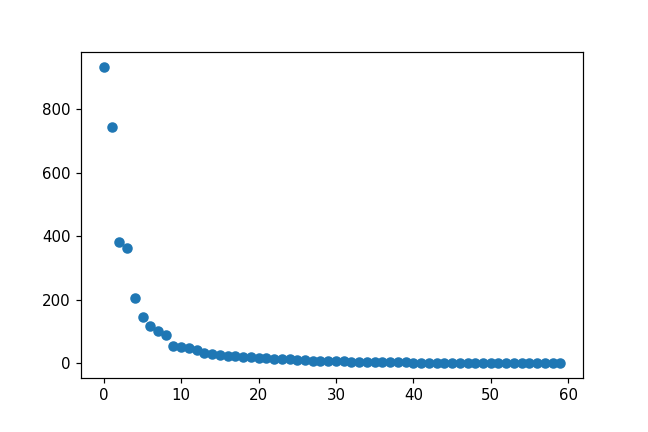

In [259]:
plt.figure()
plt.scatter(np.arange(len(S)), varY)

In [260]:
d = sum(S**2) / sum(S)**2
print(d, d * len(S))

0.044784619768168735 2.687077186090124


<IPython.core.display.Javascript object>


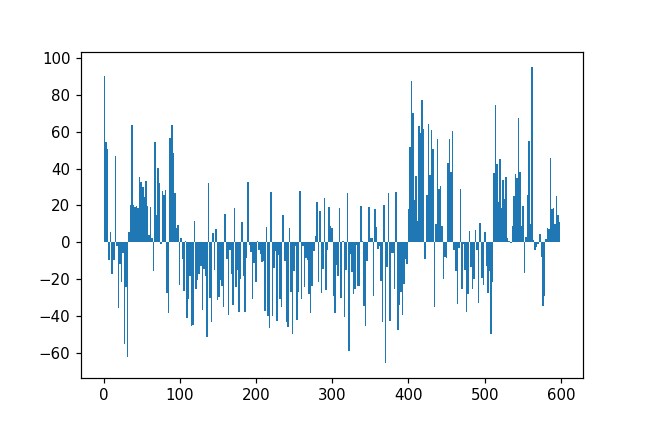

<BarContainer object of 299 artists>

In [261]:
%matplotlib notebook
plt.figure()
plt.bar(bin_centers, Y[:, 0], width=bin_width)

In [267]:
a = np.arange(100)**5 / 100**4
sum(a**2) / sum(a)**2

0.2840732266909376